In [52]:
import pandas as pd
import numpy as np
import scipy.special

In [10]:
data_file=open("mnist_train_100.csv",'r')
data_list=data_file.readlines()
len(data_list)
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [11]:
pd.read_csv("mnist_test_10.csv")

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
import matplotlib.pyplot as plt

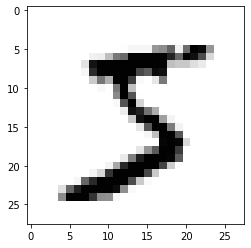

In [27]:
type(all_values) # 784 -> array(28,28) 바꾸어줘야함
all_values[1:] #문자로 된 숫자-> 실수로 변환 (asfarry사용)
image_array=np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array,cmap='Greys',interpolation=None)

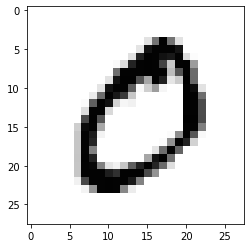

In [30]:
all_values=data_list[1].split(",")
type(all_values) # 784 -> array(28,28) 바꾸어줘야함
#문자로 된 숫자-> 실수로 변환 (asfarry사용)
image_array=np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array,cmap='Greys',interpolation=None)

In [ ]:
0~255 -> 0.01~1.0
(0~255)/255 => (0~1)*0.99=> (0~0.99)+0.01

In [33]:
scaled_input=(np.asfarray(all_values[1:])/255*0.99)+0.01

In [ ]:
"""
레이블(정답) | 입력데이터5에 대한 결과 
0          |  0.0
1          |  0.01
...5       |  0.99
9          |  0.00 
"""

In [36]:
onodes=10 #출력 노드 종류가 10가지
targets=np.zeros(onodes)+0.01

In [38]:
targets[int(all_values[0])]=0.99

In [39]:
targets

array([0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [72]:
class neuralNetwork():
    #신경망 초기화 기능
    def __init__(self,input_nodes,\
                hidden_nodes,output_nodes,learning_rate):
        self.inodes=input_nodes
        self.hnodes=hidden_nodes
        self.onodes=output_nodes
        self.lr=learning_rate
        #가중치는 행렬로 표현
        #입력/은닉 가중치 행렬:(은닉노드*입력노드)관행적으로
        self.wih=np.random.normal(0.0, #<-형식:normal(평균,표준편차,개수)
                         pow(self.hnodes,-0.5),
                         (self.hnodes,self.inodes))
        #입력/은닉 가중치 행렬:(은닉노드*입력노드)관행적으로
        self.who=np.random.normal(0.0,
                         pow(self.onodes,-0.5),
                         (self.onodes,self.hnodes))
        self.activation_function=lambda x:scipy.special.expit(x)
        pass
    #신경망 학습 기능(2단계)
    #1단계(forward propagation): 입력데이터에 대해 계산(query)
    #2단계(backward propagation): 예측값과 실제값의 차이를 계산->가중치 업데이트 단계
    def train(self,inputs_list,targets_list):
        inputs=np.array(inputs_list,ndmin=2).T
        targets=np.array(targets_list,ndmin=2).T
        
         #은닉계층으로 들어오는 신호를 계산
        hidden_inputs=np.dot(self.wih,inputs)
        #은닉계층에서 나가는 신호 계산
        hidden_outputs=self.activation_function(hidden_inputs)
        #출력계층으로 들어오는 신호를 계산
        final_inputs=np.dot(self.who,hidden_outputs)
        #출력계층에서 나가는 신호 계산
        final_outputs=self.activation_function(final_inputs)
        
        output_errors=targets-final_outputs
        #오차=실제값-예측값
        
        #은닉 계층 노드에 대한 역전파된 오차
        #은닉 계층의 오차는 가중치에 의해 나뉜
        #출력 계층의 오차들을 재조합하여 계산
        hidden_errors=np.dot(self.who.T,output_errors)
        #은닉 계층과 출력 계층 간의 가중치 업데이트(who를 업데이트)
        self.who+=self.lr*np.dot\
        ((output_errors*final_outputs*(1.0-final_outputs)),
                       np.transpose(hidden_outputs))
        self.wih+=self.lr*np.dot\
        ((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),
                       np.transpose(hidden_inputs))
        
        pass
    #신경망 질의 기능
    #신경ㅇ망으로 들어오는 입력을 받아 출력하는 node
    def query(self,inputs_list):
        #입력리스트를 2차원 행렬로 변환
        inputs=np.array(inputs_list,ndmin=2).T
        #은닉계층으로 들어오는 신호를 계산
        hidden_inputs=np.dot(self.wih,inputs)
        #은닉계층에서 나가는 신호 계산
        hidden_outputs=self.activation_function(hidden_inputs)
        #출력계층으로 들어오는 신호를 계산
        final_inputs=np.dot(self.who,hidden_outputs)
        #출력계층에서 나가는 신호 계산
        final_outputs=self.activation_function(final_inputs)
        return final_outputs

In [73]:
#입력, 은닉, 출력 노드의 수
input_nodes=784
hidden_nodes=100
output_nodes=10 # 0~9 확률

#학습률 = 0.3
learning_rate=0.3

#신경망 객체 생성
n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
#mnist 트레이닝 데이터 불러오기
training_data_file=open("mnist_train_100.csv",'r')
training_data_list=training_data_file.readlines()
training_data_file.close()


epochs=10
for e in range(epochs):
    #신경망 학습
    for record in training_data_list:
        all_values=record.split(',')
        inputs=(np.asfarray(all_values[1:])/255*0.99)+0.01
        #0.01~1.0으로 스케일링
        #결과값 생성
        targets=np.zeros(output_nodes)+0.01
        targets[int(all_values[0])]=0.99
        n.train(inputs,targets)





ValueError: operands could not be broadcast together with shapes (100,784) (100,100) (100,784) 

In [59]:
test_data_file=open("mnist_test_10.csv",'r')
test_data_list=test_data_file.readlines()
test_data_file.close()

In [ ]:
all_values=test_data_list[0].split(',')
all_values[0] # 첫번째 테스트 데이터 정답: 7

image_array=np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array,cmap='Greys') # <- 정답 출력하는 코드


In [ ]:
#지금까지의 prediction 함수의 역할
outputs=n.query((np.asfarray(all_values[1:])/255*0.99)+0.01)
label=np.argmax(outputs)
print(label,":my network's answer")

In [68]:
scorecard=[]
for record in test_data_list:
    all_values=record.split(",")
    #정답
    correct_label=int(all_values[0])
    print(correct_label,":correct_label")
    outputs=n.query((np.asfarray(all_values[1:])/255*0.99)+0.01)
    label=np.argmax(outputs)
    print(label,":my network's answer")
    
    if (label==correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
scorecard_array=np.asarray(scorecard)
print(scorecard_array.sum()/scorecard_array.size)

7 :correct_label
7 :my network's answer
2 :correct_label
7 :my network's answer
1 :correct_label
7 :my network's answer
0 :correct_label
7 :my network's answer
4 :correct_label
7 :my network's answer
1 :correct_label
5 :my network's answer
4 :correct_label
7 :my network's answer
9 :correct_label
7 :my network's answer
5 :correct_label
7 :my network's answer
9 :correct_label
7 :my network's answer
0.1


In [45]:
len(traning_data_list)
open("mnist_test_10.csv",'r')

100

In [ ]:
# tk  - Ok     error
# 0     0.05    0.05(e1)
# 0     0.1
# 0     0.2
# 0
# 0
# 0
# 0
# 1
# 0
# 0
# 0     0.2    (e10)        